##3.1 RGB image of a tree
In this section we will create an RGB image of a tree. By the end of this section you should produce an image like this.

<img src=img/birch.op.png width=400>

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips2img import *

##Running start to create RGB image

Below is an example of running a spectral simulation:

<code>echo <font color=red>14</font> <font color=blue>camera.dat</font> <font color=green>light.dat</font> | <font color=brown>start</font> -v <font color=pink>-RATm 5</font> <font color=orange>-RATsensor_wavebands waveband.dat</font> birch_tree.obj</code>

where:

<code><font color=red>14</font></code> is the librat mode

<code><font color=blue>camera.dat</font></code> points at the <code><span style="background-color:lightgrey">camera.dat</span></code> file

<code><font color=green>light.dat</font></code> points at the <code><span style="background-color:lightgrey">light.dat</span></code> file

This pipes to <font color=brown>start</font> running in verbose (-v) mode, <font color=brown>start</font> has the additional following options:

<code><font color=pink>-RATm 5</font></code> stipulates the oder of scattering, in this case 5 orders.

<code><font color=orange>-RATsensor_wavebands waveband.dat</font></code> points at a list of wavebands to simulate, these must correspond to wavelengths in the material reflectance files.

<code>birch_tree.obj</code> points at the <code><span style="background-color:lightgrey">birch_tree.obj</span></code>

##Setting common in options in <code><span style="background-color:lightgrey">camera.dat</span></code>
Instead of setting options at the command line, they are now set in <code><span style="background-color:lightgrey">camera.dat</span></code>.  Some of the most common settings are listed below.

start:

	VERBOSE flag on (-v option)

read_spectral_file:	4 data entries read in file wb/waveband.dat

camera simple camera: at 0.000000 0.000000 10.000000 focalLength: 5.000000

camera simple illumination: orthographic at  0.000000 0.000000 0.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 45.000000 azimuth 0.000000 twist 0.000000

(100.00)


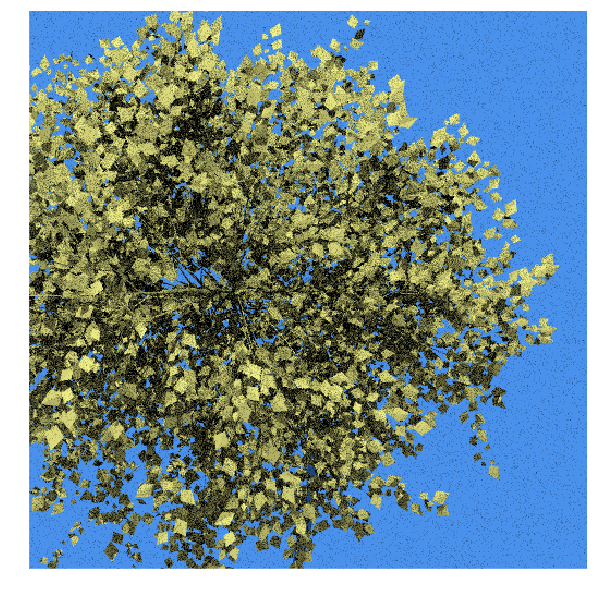

In [15]:
# all .obj and .dat are in specific folders e.g. camera.dat 
# is in the camera directory
cmd = 'echo 14 camera/camera.dat light/light.dat | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # if producing an RGB image use the 'stretch' arg otherwise
    # image is dark
    hips2img('output/birch.op.hips', stretch=True)

##Creating a spectra from the output

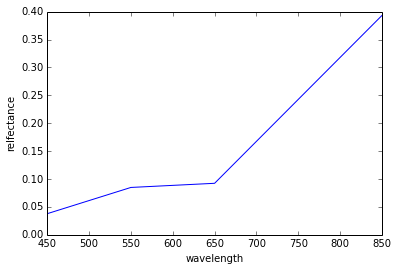

In [8]:
spectra = np.loadtxt('output/birch.op.results.direct')
wb = np.loadtxt('waveband.dat')
plt.plot(wb[:, 1], spectra[:, 1:].sum(axis=0))
plt.xlabel('wavelength')
plt.ylabel('relfectance')